In [2]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups(subset='all', shuffle=True, remove=('headers', 'footers', 'quotes'))

In [3]:
data_labels_map = dict(enumerate(data.target_names))

In [4]:
import pandas as pd
df = pd.DataFrame({'Article': data.data, 'Target Label': data.target})
df.head()

,Article,Target Label
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4


In [5]:
df['Target Name'] = df['Target Label'].map(data_labels_map)

In [6]:
# Remove empty documents
df = df[df['Article'].str.strip().astype(bool)]

In [7]:
df.head()

,Article,Target Label,Target Name
0,\n\nI am sure some bashers of Pens fans are pr...,10,rec.sport.hockey
1,My brother is in the market for a high-perform...,3,comp.sys.ibm.pc.hardware
2,\n\n\n\n\tFinally you said what you dream abou...,17,talk.politics.mideast
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,comp.sys.ibm.pc.hardware
4,1) I have an old Jasmine drive which I cann...,4,comp.sys.mac.hardware


In [8]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.33, random_state=18)

In [9]:
# Create the Bag of Words (BOW) features
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
train_bow = vectorizer.fit_transform(train_df['Article'])
test_bow = vectorizer.transform(test_df['Article'])

In [25]:
# Train logistic regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=18, max_iter=1000)
lr.fit(train_bow, train_df['Target Label'])

LogisticRegression(max_iter=1000, random_state=18)

In [29]:
# Evaluate performance on test set
from sklearn.metrics import accuracy_score, classification_report

y_pred = lr.predict(test_bow)
accuracy = accuracy_score(test_df['Target Label'], y_pred)
report = classification_report(test_df['Target Label'], y_pred, target_names=data.target_names)

print(f"Accuracy: {accuracy:.2f}")
print(f"Classification report:\n{report}")

Accuracy: 0.67
Classification report:
                          precision    recall  f1-score   support

             alt.atheism       0.51      0.51      0.51       245
           comp.graphics       0.67      0.71      0.69       312
 comp.os.ms-windows.misc       0.64      0.64      0.64       308
comp.sys.ibm.pc.hardware       0.62      0.63      0.62       318
   comp.sys.mac.hardware       0.69      0.66      0.68       307
          comp.windows.x       0.75      0.73      0.74       325
            misc.forsale       0.79      0.78      0.78       320
               rec.autos       0.66      0.71      0.68       331
         rec.motorcycles       0.59      0.69      0.64       320
      rec.sport.baseball       0.70      0.80      0.75       324
        rec.sport.hockey       0.83      0.79      0.81       332
               sci.crypt       0.76      0.73      0.74       325
         sci.electronics       0.65      0.57      0.61       346
                 sci.med       0.74  

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Remove accented characters
    text = text.encode('ascii', 'ignore').decode('utf-8')
    # Remove special characters
    text = re.sub(r'[^\w\s]', ' ', text)
    # Remove numbers
    text = re.sub(r'[\d]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = nltk.word_tokenize(text)
   # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if not token in stop_words] 
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into document
    clean_text = ' '.join(tokens)
    return clean_text

In [11]:
# Clean the text in the DataFrame
df['Clean Article'] = df['Article'].apply(clean_text)

# Select the columns to keep in the DataFrame
data_df = df[['Article', 'Clean Article', 'Target Label', 'Target Name']]

In [12]:
data_df.head(10)

,Article,Clean Article,Target Label,Target Name
0,\n\nI am sure some bashers of Pens fans are pr...,sure bashers pen fan pretty confused lack kind...,10,rec.sport.hockey
1,My brother is in the market for a high-perform...,brother market high performance video card sup...,3,comp.sys.ibm.pc.hardware
2,\n\n\n\n\tFinally you said what you dream abou...,finally said dream mediterranean new area grea...,17,talk.politics.mideast
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,think scsi card dma transfer disk scsi card dm...,3,comp.sys.ibm.pc.hardware
4,1) I have an old Jasmine drive which I cann...,old jasmine drive use new system understanding...,4,comp.sys.mac.hardware
5,\n\nBack in high school I worked as a lab assi...,back high school worked lab assistant bunch ex...,12,sci.electronics
6,\n\nAE is in Dallas...try 214/241-6060 or 214/...,ae dallas try tech support may line one get st...,4,comp.sys.mac.hardware
7,"\n[stuff deleted]\n\nOk, here's the solution t...",stuff deleted ok solution problem move canada ...,10,rec.sport.hockey
8,"\n\n\nYeah, it's the second one. And I believ...",yeah second one believe price trying get good ...,10,rec.sport.hockey
9,\nIf a Christian means someone who believes in...,christian mean someone belief divinity jesus s...,19,talk.religion.misc


In [13]:
# Print the distribution of articles by newsgroup category
print(data_df['Target Name'].value_counts())

comp.windows.x              982
rec.sport.hockey            975
soc.religion.christian      975
rec.motorcycles             969
comp.sys.ibm.pc.hardware    964
sci.crypt                   962
sci.med                     960
misc.forsale                959
rec.sport.baseball          958
sci.electronics             958
comp.graphics               955
sci.space                   955
comp.os.ms-windows.misc     947
rec.autos                   937
comp.sys.mac.hardware       929
talk.politics.mideast       919
talk.politics.guns          886
alt.atheism                 779
talk.politics.misc          756
talk.religion.misc          606
Name: Target Name, dtype: int64


In [14]:
train_data_df, test_data_df = train_test_split(data_df, test_size=0.33, random_state=18)

In [15]:
vectorizer = CountVectorizer()
train_bow_data_df = vectorizer.fit_transform(train_data_df['Clean Article'])
test_bow_data_df = vectorizer.transform(test_data_df['Clean Article'])

## Naïve Bayes

In [96]:
from sklearn.naive_bayes import MultinomialNB

# Train the model
nb = MultinomialNB()
nb.fit(train_bow_data_df, train_data_df['Target Label'])

# Predict on test set
nb_pred = nb.predict(test_bow_data_df)

# Evaluate performance
print(classification_report(test_data_df['Target Label'], nb_pred, target_names=data_labels_map.values()))

                          precision    recall  f1-score   support

             alt.atheism       0.71      0.42      0.53       245
           comp.graphics       0.50      0.78      0.61       312
 comp.os.ms-windows.misc       0.84      0.10      0.18       308
comp.sys.ibm.pc.hardware       0.59      0.69      0.64       318
   comp.sys.mac.hardware       0.73      0.74      0.73       307
          comp.windows.x       0.65      0.81      0.72       325
            misc.forsale       0.86      0.69      0.76       320
               rec.autos       0.85      0.76      0.80       331
         rec.motorcycles       0.93      0.66      0.77       320
      rec.sport.baseball       0.91      0.84      0.87       324
        rec.sport.hockey       0.93      0.86      0.89       332
               sci.crypt       0.69      0.83      0.76       325
         sci.electronics       0.76      0.54      0.63       346
                 sci.med       0.80      0.87      0.83       295
         

## SVM

In [101]:
from sklearn.svm import LinearSVC

# Train the model
svm = LinearSVC(max_iter=100000)
svm.fit(train_bow_data_df, train_data_df['Target Label'])

# Predict on test set
svm_pred = svm.predict(test_bow_data_df)

# Evaluate performance
print(classification_report(test_data_df['Target Label'], svm_pred, target_names=data_labels_map.values()))

                          precision    recall  f1-score   support

             alt.atheism       0.47      0.49      0.48       245
           comp.graphics       0.65      0.65      0.65       312
 comp.os.ms-windows.misc       0.61      0.62      0.62       308
comp.sys.ibm.pc.hardware       0.60      0.59      0.59       318
   comp.sys.mac.hardware       0.65      0.68      0.67       307
          comp.windows.x       0.71      0.69      0.70       325
            misc.forsale       0.71      0.74      0.72       320
               rec.autos       0.65      0.69      0.67       331
         rec.motorcycles       0.67      0.71      0.69       320
      rec.sport.baseball       0.72      0.77      0.75       324
        rec.sport.hockey       0.82      0.80      0.81       332
               sci.crypt       0.71      0.74      0.73       325
         sci.electronics       0.61      0.56      0.58       346
                 sci.med       0.75      0.77      0.76       295
         

## Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_bow_data_df, train_data_df['Target Name'])

# Predict on test set
rf_pred = rf.predict(test_bow_data_df)

# Evaluate performance
print(classification_report(test_data_df['Target Label'], rf_pred, target_names=data_labels_map.values()))

                          precision    recall  f1-score   support

             alt.atheism       0.58      0.44      0.50       245
           comp.graphics       0.54      0.63      0.58       312
 comp.os.ms-windows.misc       0.65      0.72      0.68       308
comp.sys.ibm.pc.hardware       0.60      0.64      0.62       318
   comp.sys.mac.hardware       0.71      0.69      0.70       307
          comp.windows.x       0.70      0.75      0.72       325
            misc.forsale       0.68      0.77      0.72       320
               rec.autos       0.66      0.70      0.68       331
         rec.motorcycles       0.67      0.69      0.68       320
      rec.sport.baseball       0.63      0.78      0.70       324
        rec.sport.hockey       0.75      0.86      0.80       332
               sci.crypt       0.77      0.77      0.77       325
         sci.electronics       0.67      0.47      0.55       346
                 sci.med       0.77      0.77      0.77       295
         

## RNN & LSTM

In [108]:
articles = data_df['Clean Article'].values
labels = data_df['Target Label'].values

In [109]:
len(labels),len(articles)

(18331, 18331)

In [110]:
labels[1],articles[1]

(3,
 'brother market high performance video card support vesa local bus mb ram anyone suggestion idea diamond stealth pro local bus orchid farenheit ati graphic ultra pro high performance vlb card please post email thank matt')

In [177]:
vocab_size = 5000
embedding_dim = 32
max_length = 200
oov_tok = '<OOV>' #  Out of Vocabulary
training_portion = 0.66

In [178]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

In [179]:
print('train_articles' ,len(train_articles))
print('train_labels', len(train_labels))
print('validation_articles', len(validation_articles))
print('validation_labels', len(validation_labels))

train_articles 12098
train_labels 12098
validation_articles 6233
validation_labels 6233


In [180]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

In [181]:
dict(list(word_index.items())[200:])

{'rather': 201,
 'public': 202,
 'answer': 203,
 'non': 204,
 'team': 205,
 'hard': 206,
 'done': 207,
 'several': 208,
 'able': 209,
 'message': 210,
 'others': 211,
 'university': 212,
 'application': 213,
 'next': 214,
 'thought': 215,
 'price': 216,
 'driver': 217,
 'nothing': 218,
 'else': 219,
 'disk': 220,
 'standard': 221,
 'yet': 222,
 'address': 223,
 'american': 224,
 'format': 225,
 'kind': 226,
 'maybe': 227,
 'subject': 228,
 'yes': 229,
 'seen': 230,
 'quite': 231,
 'display': 232,
 'scsi': 233,
 'looking': 234,
 'hand': 235,
 'human': 236,
 'mr': 237,
 'always': 238,
 'code': 239,
 'package': 240,
 'mac': 241,
 'wrong': 242,
 'copy': 243,
 'server': 244,
 'president': 245,
 'show': 246,
 'given': 247,
 'email': 248,
 'phone': 249,
 'left': 250,
 'claim': 251,
 'bad': 252,
 'area': 253,
 'getting': 254,
 'trying': 255,
 'speed': 256,
 'sound': 257,
 'info': 258,
 'heard': 259,
 'ever': 260,
 'cost': 261,
 'week': 262,
 'mb': 263,
 'away': 264,
 'sun': 265,
 'news': 266,


In [182]:
train_sequences = tokenizer.texts_to_sequences(train_articles)
len(train_sequences)

12098

In [183]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(train_sequences, maxlen=max_length)

In [184]:
len(train_padded),len(train_padded[0])

(12098, 200)

In [185]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length)

In [186]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [187]:
import numpy as np


training_label_seq = np.array(train_labels)
validation_label_seq = np.array(validation_labels)

## RNN

In [205]:
from keras.models import Sequential
from keras.layers import Embedding, Dropout, SimpleRNN, Dense, LSTM, Bidirectional

model = Sequential()
model.add(Embedding(vocab_size,embedding_dim ))
model.add(Dropout(0.5))
model.add(SimpleRNN(units = embedding_dim))
model.add(Dense(20,activation='softmax'))
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, None, 32)          160000    
                                                                 
 dropout_15 (Dropout)        (None, None, 32)          0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 20)                660       
                                                                 
Total params: 162,740
Trainable params: 162,740
Non-trainable params: 0
_________________________________________________________________


In [206]:
import tensorflow as tf

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [207]:
num_epochs = 20
history = model.fit(train_padded, training_label_seq, epochs=num_epochs,
                    validation_data=(validation_padded, validation_label_seq),
                    verbose=2)

Epoch 1/20
379/379 - 17s - loss: 2.9036 - accuracy: 0.0965 - val_loss: 2.7163 - val_accuracy: 0.1531 - 17s/epoch - 45ms/step
Epoch 2/20
379/379 - 19s - loss: 2.4067 - accuracy: 0.2262 - val_loss: 2.2330 - val_accuracy: 0.2381 - 19s/epoch - 49ms/step
Epoch 3/20
379/379 - 21s - loss: 2.0809 - accuracy: 0.3117 - val_loss: 2.1133 - val_accuracy: 0.2734 - 21s/epoch - 55ms/step
Epoch 4/20
379/379 - 20s - loss: 1.8985 - accuracy: 0.3770 - val_loss: 2.1150 - val_accuracy: 0.2804 - 20s/epoch - 54ms/step
Epoch 5/20
379/379 - 23s - loss: 1.7190 - accuracy: 0.4371 - val_loss: 2.0710 - val_accuracy: 0.3023 - 23s/epoch - 60ms/step
Epoch 6/20
379/379 - 19s - loss: 1.6218 - accuracy: 0.4764 - val_loss: 2.0847 - val_accuracy: 0.3021 - 19s/epoch - 51ms/step
Epoch 7/20
379/379 - 21s - loss: 1.4825 - accuracy: 0.5274 - val_loss: 2.1045 - val_accuracy: 0.3143 - 21s/epoch - 54ms/step
Epoch 8/20
379/379 - 21s - loss: 1.3834 - accuracy: 0.5464 - val_loss: 2.1025 - val_accuracy: 0.3191 - 21s/epoch - 55ms/step


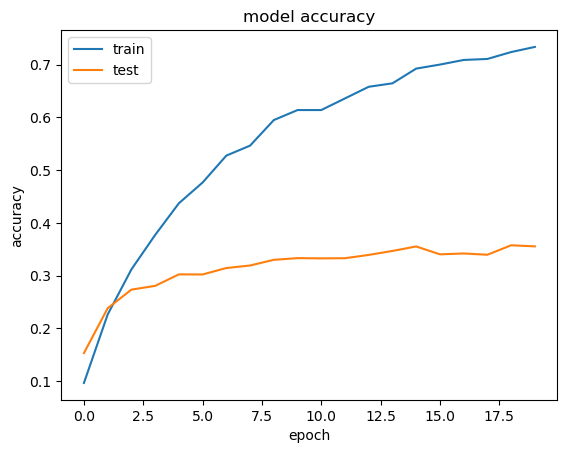

In [208]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## LSTM

In [212]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(vocab_size,embedding_dim ))
model.add(Bidirectional(LSTM(embedding_dim)))
model.add(Dropout(0.5))
model.add(Dense(20,activation='softmax' ))
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, None, 32)          160000    
                                                                 
 bidirectional_13 (Bidirecti  (None, 64)               16640     
 onal)                                                           
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 20)                1300      
                                                                 
Total params: 177,940
Trainable params: 177,940
Non-trainable params: 0
_________________________________________________________________


In [213]:
# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [214]:
# Train the model
num_epochs = 20
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/20
379/379 - 73s - loss: 2.9010 - accuracy: 0.1040 - val_loss: 2.6132 - val_accuracy: 0.1834 - 73s/epoch - 192ms/step
Epoch 2/20
379/379 - 75s - loss: 2.4390 - accuracy: 0.2236 - val_loss: 2.1395 - val_accuracy: 0.2827 - 75s/epoch - 199ms/step
Epoch 3/20
379/379 - 76s - loss: 2.0143 - accuracy: 0.3178 - val_loss: 1.9258 - val_accuracy: 0.3506 - 76s/epoch - 201ms/step
Epoch 4/20
379/379 - 76s - loss: 1.8397 - accuracy: 0.3712 - val_loss: 1.9104 - val_accuracy: 0.3584 - 76s/epoch - 201ms/step
Epoch 5/20
379/379 - 77s - loss: 1.6369 - accuracy: 0.4368 - val_loss: 1.7931 - val_accuracy: 0.4088 - 77s/epoch - 203ms/step
Epoch 6/20
379/379 - 77s - loss: 1.4936 - accuracy: 0.4899 - val_loss: 1.6595 - val_accuracy: 0.4566 - 77s/epoch - 202ms/step
Epoch 7/20
379/379 - 76s - loss: 1.4310 - accuracy: 0.5148 - val_loss: 1.6665 - val_accuracy: 0.4641 - 76s/epoch - 200ms/step
Epoch 8/20
379/379 - 78s - loss: 1.3245 - accuracy: 0.5455 - val_loss: 1.6503 - val_accuracy: 0.4771 - 78s/epoch - 205

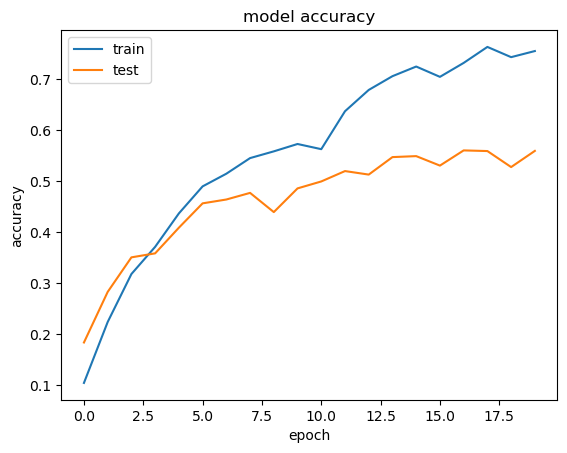

In [215]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()